In [3]:
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np 
import os
import cv2
import pickle
import pathlib

In [4]:
path = pathlib.Path('PetImages')

In [5]:
str(path)

'PetImages'

In [58]:
cat = list(path.glob("**/Cat/**/*.jpg"))
cat=cat[:6000]


In [59]:
dog= list(path.glob("**/Dog/**/*.jpg"))
dog=dog[:6000]

In [60]:
x, y = [], []

for i, image_list in enumerate([cat, dog]):
    for j in image_list:
        img = cv2.imread(str(j))
        if img is None:
            print(f"Failed to load image: {j}")
            continue
        img = cv2.resize(img, (50, 50))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        x.append(img)
        y.append(i)


Failed to load image: PetImages\Cat\10125.jpg
Failed to load image: PetImages\Cat\10404.jpg
Failed to load image: PetImages\Cat\10501.jpg
Failed to load image: PetImages\Cat\10820.jpg
Failed to load image: PetImages\Cat\11210.jpg
Failed to load image: PetImages\Cat\11565.jpg
Failed to load image: PetImages\Cat\11874.jpg
Failed to load image: PetImages\Cat\11935.jpg
Failed to load image: PetImages\Cat\140.jpg
Failed to load image: PetImages\Cat\2663.jpg
Failed to load image: PetImages\Cat\3300.jpg
Failed to load image: PetImages\Cat\3491.jpg
Failed to load image: PetImages\Dog\10158.jpg
Failed to load image: PetImages\Dog\10401.jpg
Failed to load image: PetImages\Dog\10747.jpg
Failed to load image: PetImages\Dog\10797.jpg
Failed to load image: PetImages\Dog\11410.jpg
Failed to load image: PetImages\Dog\11675.jpg
Failed to load image: PetImages\Dog\11849.jpg
Failed to load image: PetImages\Dog\11853.jpg
Failed to load image: PetImages\Dog\1308.jpg
Failed to load image: PetImages\Dog\1866

In [98]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [61]:
x=np.array(x)
y=np.array(y)

In [62]:
x = x.reshape(len(x), -1)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [64]:
x_train=x_train/255
x_test=x_test/255

In [65]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [66]:
model = svm.SVC(kernel='rbf', C=2.5, gamma=0.01)
model.fit(x_train, y_train)

SVC(C=2.5, gamma=0.01)

In [67]:
model.score(x_test,y_test)

0.6521920668058455

In [78]:
model.predict(x_test[31:39])


array([0, 0, 1, 1, 1, 1, 0, 0])

In [80]:
y_test[31:39]

array([1, 1, 0, 1, 1, 1, 0, 0])

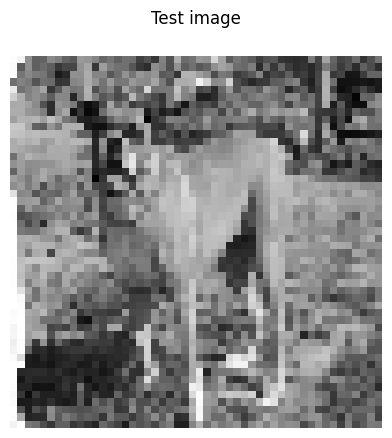

In [99]:
import matplotlib.pyplot as plt
plt.matshow(x_test[101].reshape(50, 50), cmap='gray')
plt.title("Test image")
plt.axis('off')
plt.show()


In [100]:
model.predict([x_test[101]])

array([1])